# Zero-Shot Object Detection and Segmentation with YOLOE

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yoloe)
[![arXiv](https://img.shields.io/badge/arXiv-2503.07465-b31b1b.svg)](https://arxiv.org/abs/2503.07465)
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-and-segmentation-with-yoloe.ipynb)

Object detection and segmentation are often constrained by predefined categories or heavy open-set methods. YOLOE consolidates detection and segmentation for text, visual, or no prompts in one efficient model. It re-parameterizes textual embeddings, employs a semantic-activated visual prompt encoder, and leverages a built-in vocabulary for prompt-free detection. Extensive tests show real-time performance, strong zero-shot transferability, and lower training cost. On LVIS, YOLOE outperforms YOLO-Worldv2 with 3× less training cost and faster inference. On COCO, YOLOE exceeds closed-set YOLOv8 with nearly 4× fewer training hours.

![YOLOE architecture](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yoloe-2.png)

![YOLOE example results](https://drive.google.com/uc?export=view&id=1fLeC4o3OUw6r-HZlzgrVWSxQ4obUf89n)


## Environment setup

### Check GPU availability

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Oct 26 14:31:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Install dependencies

In [2]:
!pip install -q "git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/CLIP"
!pip install -q "git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/ml-mobileclip"
!pip install -q "git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/lvis-api"
!pip install -q "git+https://github.com/THU-MIG/yoloe.git"

!pip install -q supervision jupyter_bbox_widget

!wget -q https://docs-assets.developer.apple.com/ml-research/datasets/mobileclip/mobileclip_blt.pt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.7 MB/s eta 0:00:00


### Pull weights

In [3]:
from huggingface_hub import hf_hub_download

path = hf_hub_download(repo_id="jameslahm/yoloe", filename="yoloe-v8l-seg.pt", local_dir='.')
path = hf_hub_download(repo_id="jameslahm/yoloe", filename="yoloe-v8l-seg-pf.pt", local_dir='.')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


yoloe-v8l-seg.pt:   0%|          | 0.00/107M [00:00<?, ?B/s]

yoloe-v8l-seg-pf.pt:   0%|          | 0.00/103M [00:00<?, ?B/s]

### Download example data

If you want to run the cookbook using your own file as input, simply upload video to Google Colab and replace `SOURCE_IMAGE_PATH` and `SOURCE_VIDEO_PATH` with the path to your file.

In [1]:
!pip install -q gdown

import gdown

# Shared folder URL
folder_url = "https://drive.google.com/drive/folders/1EKB-7A3YzsigDRM6Z9KNFLVTLuC21Mg-?usp=sharing"

# Authenticate (popup will appear)
gdown.download_folder(url=folder_url, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 11fggHASk6cCSq2V37rga-A4EsPyKH5iI A1.png
Processing file 1ZklPdxFizPDkA1-DqcGmZvhmfUNWHJlk A2.png
Processing file 19d2Z-Exz4kyvQ_4hrvNfY-If9OgWFPmg A3.png
Processing file 1koA31x_s07ZOXXO41SquSa1oLp_QNkPN A4.png
Processing file 1KQv2kE_9v4ENwy3QhJ9E-05JbCU42UIF A5.png
Processing file 16W_VvG8TUJPCJwctxeaz5EGmFfqpTRRR A6.png
Processing file 1SyY_H3y_wQ_cJV69ovK9nI42GiFk2EXa a7.png
Processing file 1zDAzHsNgR9OG15pm0EipUSfj_yYJXqkq A10.png
Processing file 15zCh2ojNQKeWmRJQAeNXezGgmQUzJV2j A11.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11fggHASk6cCSq2V37rga-A4EsPyKH5iI
To: /content/Data/A1.png
100%|██████████| 99.7k/99.7k [00:00<00:00, 3.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZklPdxFizPDkA1-DqcGmZvhmfUNWHJlk
To: /content/Data/A2.png
100%|██████████| 233k/233k [00:00<00:00, 3.78MB/s]
Downloading...
From: https://drive.google.com/uc?id=19d2Z-Exz4kyvQ_4hrvNfY-If9OgWFPmg
To: /content/Data/A3.png
100%|██████████| 240k/240k [00:00<00:00, 3.48MB/s]
Downloading...
From: https://drive.google.com/uc?id=1koA31x_s07ZOXXO41SquSa1oLp_QNkPN
To: /content/Data/A4.png
100%|██████████| 204k/204k [00:00<00:00, 3.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KQv2kE_9v4ENwy3QhJ9E-05JbCU42UIF
To: /content/Data/A5.png
100%|██████████| 301k/301k [00:00<00:00, 4.55MB/s]
Downloading...
From: https://drive.google.com/uc?id=16W_VvG8TUJPCJwctxeaz5EGmFfqpTR

['/content/Data/A1.png',
 '/content/Data/A2.png',
 '/content/Data/A3.png',
 '/content/Data/A4.png',
 '/content/Data/A5.png',
 '/content/Data/A6.png',
 '/content/Data/a7.png',
 '/content/Data/A10.png',
 '/content/Data/A11.png']

## Visual prompt for image processiong

In [5]:
import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

**NOTE:** Execute cell below and use your mouse to **draw bounding box** on the image 👇


> **📝 NOTE: Instructions for using the bounding box tool**
>
> 1. **Run the cell above** to display the image and activate the `BBoxWidget`.
> 2. **Use your mouse** to draw bounding boxes around the objects you want to annotate on the **source image**.  
>    - Click and drag to create a box.  
>    - You can resize or move it after drawing.
> 3. In the **label dropdown**, choose the correct class for each box:  
>    - `airfoil`  
>    - `pipe`  
>    - `sphere`
> 4. When finished, you can access all the drawn boxes in Python via:
>    ```python
>    click the Submit Button
>    ```
> 5. Now Move to Next cell:
>    ```python
>    widget.bboxes
>    ```




In [6]:
IS_COLAB = True
SOURCE_IMAGE_PATH = "/content/Data/A10.png"
TARGET_IMAGE_PATH = "/content/Data/A11.png"
NAMES = ['airfoil', 'pipe', "sphere"]

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget(classes=NAMES)
widget.image = encode_image(SOURCE_IMAGE_PATH)
widget

BBoxWidget(classes=['airfoil', 'pipe', 'sphere'], colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd…

In [16]:
widget.bboxes

[{'x': 139, 'y': 33, 'width': 440, 'height': 654, 'label': 'airfoil'},
 {'x': 688, 'y': 107, 'width': 1193, 'height': 117, 'label': 'pipe'},
 {'x': 814, 'y': 512, 'width': 305, 'height': 206, 'label': 'sphere'}]

**NOTE:** `YOLOEVPSegPredictor` takes `np.ndarray` box prompt in `[x_min, y_min, x_max, y_max]` format.

In [17]:
import numpy as np

default_box = [
    {'x': 216, 'y': 275, 'width': 108, 'height': 83, 'label': 'cap'},
    {'x': 225, 'y': 351, 'width': 84, 'height': 51, 'label': 'sunglasses'},
    {'x': 160, 'y': 383, 'width': 270, 'height': 555, 'label': 'dog'}
]

boxes = widget.bboxes if widget.bboxes else default_box
bboxes = np.array([
    [
        box['x'],
        box['y'],
        box['x'] + box['width'],
        box['y'] + box['height']
    ] for box in boxes
], dtype=np.float64)

print("bb box: ",bboxes)

cls = np.array([NAMES.index(box['label']) for box in boxes], dtype=np.int32)

print("class: ", cls)



bb box:  [[        139          33         579         687]
 [        688         107        1881         224]
 [        814         512        1119         718]]
class:  [0 1 2]



0: 640x640 2 object0s, 2 object1s, 3 object2s, 127.6ms
Speed: 4.1ms preprocess, 127.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


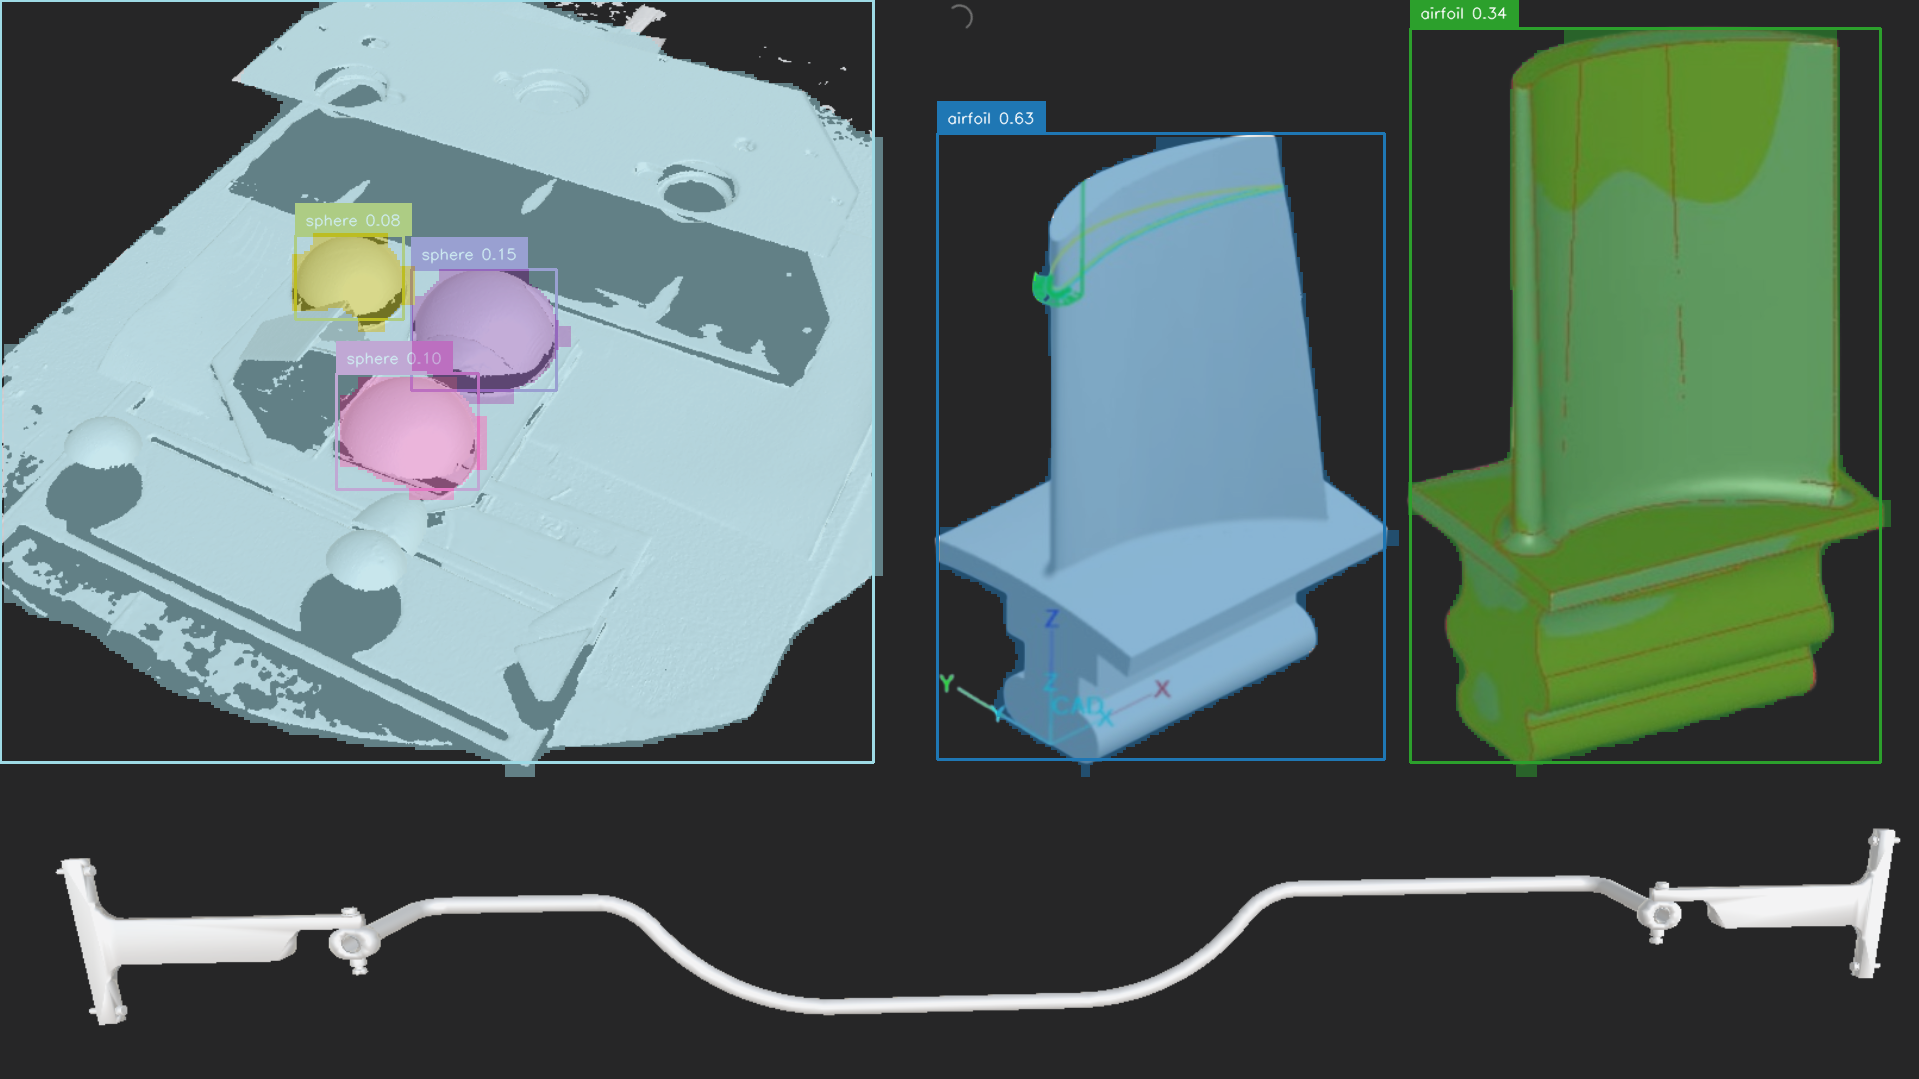

In [18]:
from ultralytics import YOLOE
from PIL import Image
import supervision as sv
import numpy as np
from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe.predict_vp import YOLOEVPSegPredictor

NAMES = ['airfoil', 'pipe', "sphere"]
TARGET_IMAGE_PATH = "/content/Data/A11.png"

# model = YOLOE("yoloe-v8l-seg.pt").cuda()
model = YOLOE("yoloe-11l-seg.pt").cuda()

prompts = dict(bboxes=bboxes, cls=cls)

source_image = Image.open(SOURCE_IMAGE_PATH)
target_image = Image.open(TARGET_IMAGE_PATH)

model.predict(source_image, prompts=prompts, predictor=YOLOEVPSegPredictor, return_vpe=True)
model.set_classes(NAMES, model.predictor.vpe)
model.predictor = None

results = model.predict(target_image, conf=0.051, verbose=False)

# Convert to supervision's standardized Detections format
detections = sv.Detections.from_ultralytics(results[0]).with_nms(0.1)

# Build instance labels: class name + confidence
labels = [
    f"{NAMES[class_id]} {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]

# CRITICAL: Generate unique colors for EACH INSTANCE (not by class)
# Create a color palette with enough colors for all instances
num_instances = len(detections)
color_palette = sv.ColorPalette.from_matplotlib("tab20", num_instances)

# Convert to list of colors
instance_colors = [color_palette.by_idx(i) for i in range(num_instances)]

# Annotate image with boxes, labels, and masks for instance segmentation
annotated_image = target_image.copy()

# Initialize annotators with color_lookup=sv.ColorLookup.INDEX
# This makes it use instance index instead of class_id for coloring
box_annotator = sv.BoxAnnotator(color=color_palette, color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color=color_palette, color_lookup=sv.ColorLookup.INDEX, text_color=sv.Color.WHITE)
mask_annotator = sv.MaskAnnotator(color=color_palette, color_lookup=sv.ColorLookup.INDEX)

# Apply annotations
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
annotated_image = mask_annotator.annotate(scene=annotated_image, detections=detections)

# Display or save annotated_image as needed
annotated_image

## Text prompt for image processiong

> 📝 **NOTE: About using text prompts with YOLOE**

> In this example, using just text prompts (e.g., `"airfoil"`) does **not produce any detections** because the model is trained on COCO classes, which do not include custom objects like airfoils.
  
> That’s why we use **Cross-Image Prompting (CIP)**: it allows the model to detect objects in the target image by providing **example annotations (bounding boxes or masks) from a source image** as prompts.



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 67.7M/67.7M [00:00<00:00, 78.0MB/s]


Build text model mobileclip:blt


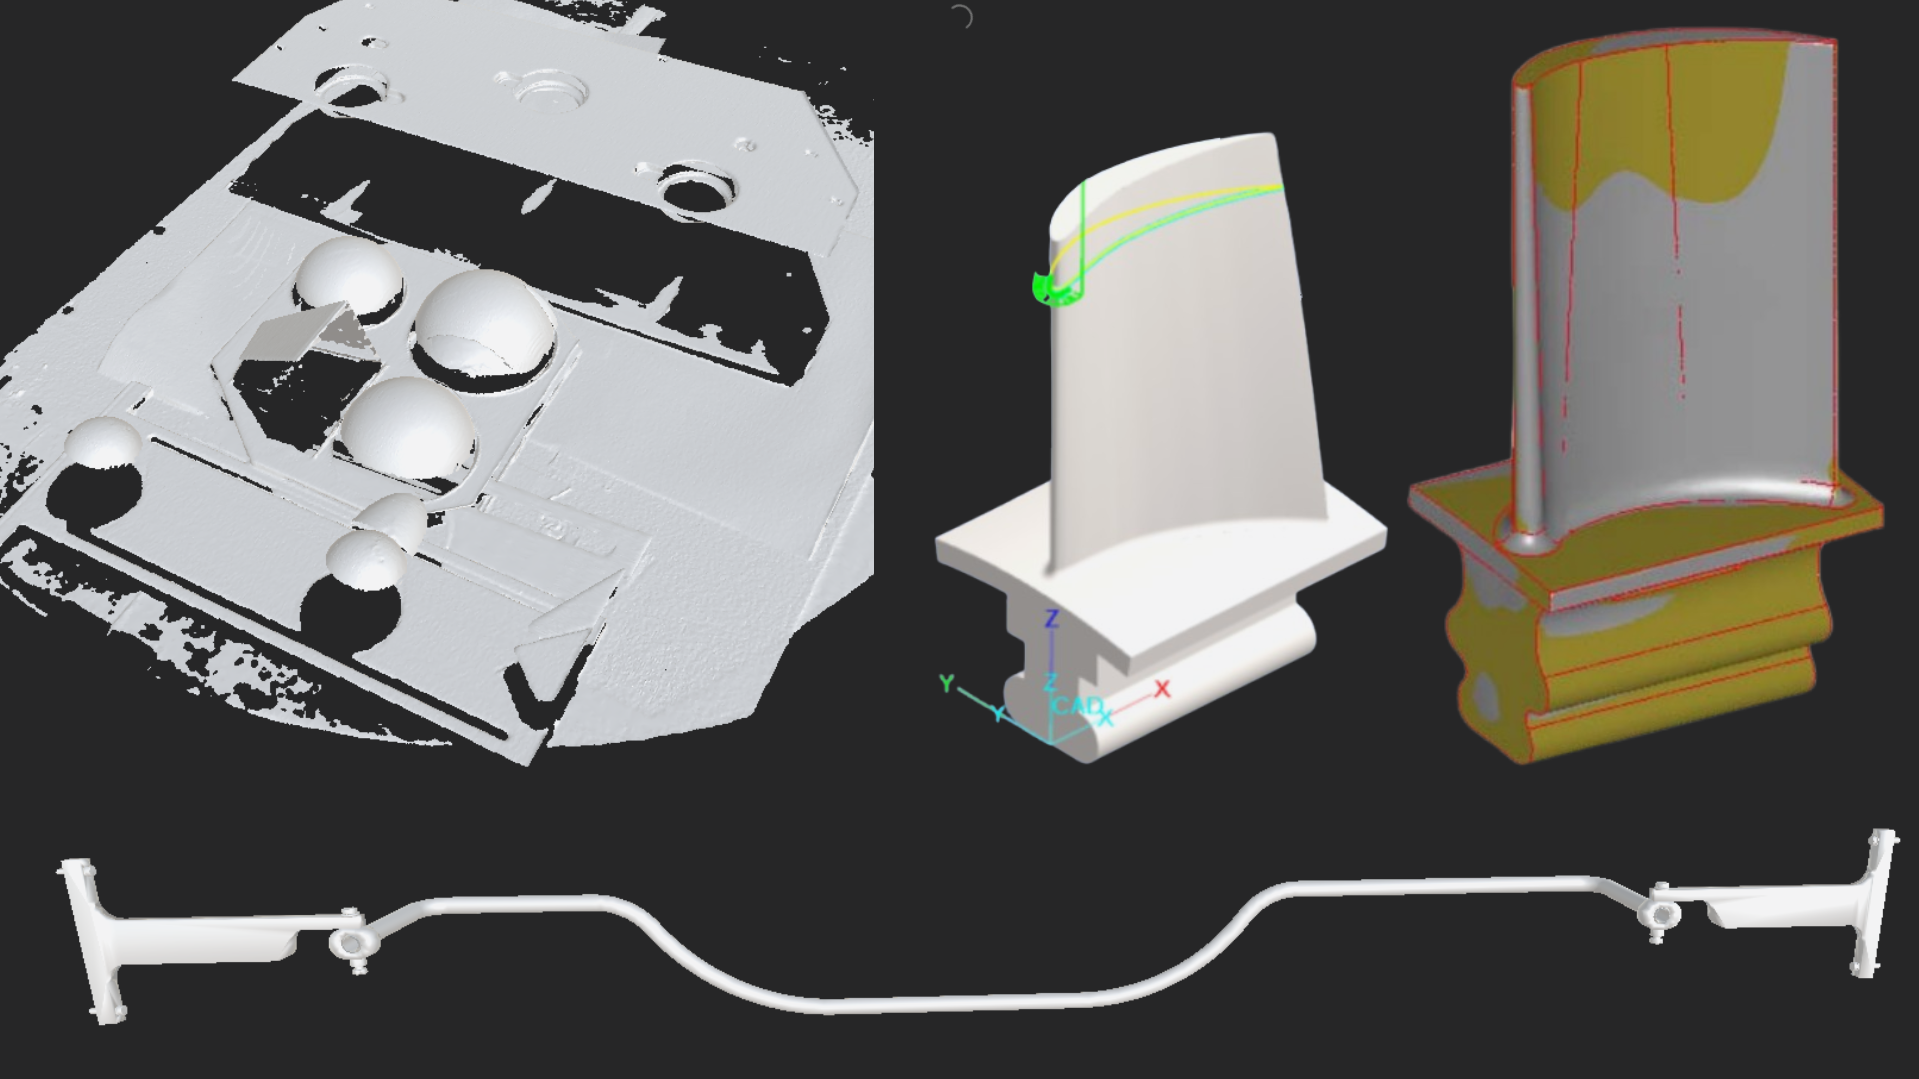

In [4]:
import supervision as sv
from ultralytics import YOLOE
from PIL import Image

# IMAGE_PATH = "dog.jpeg"
# NAMES = ["dog", "eye", "tongue", "nose", "ear"]

IMAGE_PATH = "input-A11.png"
NAMES = ["airfoil"]

# model = YOLOE("yoloe-v8l-seg.pt").cuda()
model = YOLOE("yoloe-11l-seg.pt").cuda()

model.set_classes(NAMES, model.get_text_pe(NAMES))

image = Image.open(IMAGE_PATH)
results = model.predict(image, conf=0.1, verbose=False)

detections = sv.Detections.from_ultralytics(results[0])

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(scene=annotated_image, detections=detections)
annotated_image = sv.LabelAnnotator().annotate(scene=annotated_image, detections=detections)
annotated_image = sv.MaskAnnotator().annotate(scene=annotated_image, detections=detections)

annotated_image